1. Агрегация по визитам
 
 Создай функцию aggregate_client_daily_items(df), которая:
 1. Группирует транзакции по (client, tr_date, item, item_group)
 2. Суммирует quantity и amount для каждой группы（Только когда четыре столбца данных этой строки — client, tr_date, item, item_group — совпадают, их количество и сумма будут суммированы и объединены в одну строку (для удовлетворяющих условию строк суммируются quantity и amount, чтобы получить данные, объединенные в одну строку).）
 3. Возвращает DataFrame с колонками: client, visit_date, item, item_group, quantity, amount
 4. Отсортирован по client, visit_date, item
 Комментарий: bcode (номер чека) игнорируем — нас интересует, что клиент купил в день, а не структура чеков.
 5.Вывести общее количество данных.

In [1]:
import pandas as pd

def aggregate_client_daily_items(df):
    """
    Агрегирует транзакции в визиты по клиенту и дню.
    
    Группировка: по (client, tr_date, item, item_group)
    - Суммирует quantity и amount для совпадающих строк
    - Возвращает: client, visit_date, item, item_group, quantity, amount
    - Сортировка: client, visit_date, item
    """
    
    # --- 1. Проверка размера исходных данных ---
    print(f"📊 ИСХОДНЫЕ ДАННЫЕ: {len(df)} строк")
    
    # --- 2. Проверка колонок ---
    required_cols = ['client', 'tr_date', 'item', 'quantity', 'amount']
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise KeyError(f"❌ Отсутствуют колонки: {missing}")
    
    # --- 3. Работа с копией данных ---
    df = df.copy()
    
    # Обработка отсутствующей колонки item_group
    if 'item_group' not in df.columns:
        print("🔧 Колонка 'item_group' отсутствует. Создаём заглушку: 'Unknown'")
        df['item_group'] = 'Unknown'
    
    # --- 4. Преобразование даты ---
    print("🔍 Анализ формата tr_date...")
    
    # Попытка конвертации в datetime
    # 'coerce' превратит нераспознанные даты в NaT (пустое значение)
    # dayfirst=True полезно для форматов типа DD.MM.YYYY
    df['temp_date'] = pd.to_datetime(df['tr_date'], errors='coerce', dayfirst=True)
    
    # Проверка на невалидные даты
    invalid_count = df['temp_date'].isna().sum()
    print(f"📊 Успешно распознано дат: {len(df) - invalid_count}")
    
    if invalid_count > 0:
        print(f"✂️ Удаляем {invalid_count} строк с некорректной датой")
        df = df.dropna(subset=['temp_date'])
        
    # Извлекаем только дату (YYYY-MM-DD) для корректной группировки
    df['visit_date'] = df['temp_date'].dt.date
    
    # --- 5. Очистка пустых значений ---
    before_group = len(df)
    df = df.dropna(subset=['client', 'item', 'visit_date']).copy()
    after_group = len(df)
    if before_group != after_group:
        print(f"✂️ Удалено строк с пустыми client/item/датой: {before_group - after_group}")
    
    # --- 6. Группировка ---
    # Логика: объединяем строки, только если client, visit_date, item И item_group совпадают
    print("🔄 Выполняем группировку по (client, visit_date, item, item_group)...")
    
    aggregated = (
        df.groupby(['client', 'visit_date', 'item', 'item_group'], as_index=False)
        .agg({
            'quantity': 'sum',
            'amount': 'sum'
        })
        .round(2)
    )
    
    print(f"✅ Агрегировано: {len(aggregated)} строк (после объединения)")
    
    # --- 7. Сортировка ---
    result = aggregated.sort_values(['client', 'visit_date', 'item']).reset_index(drop=True)
    
    # --- 8. Финальный результат ---
    print(f"\n🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: {len(result)} строк")
    
    return result[['client', 'visit_date', 'item', 'item_group', 'quantity', 'amount']]

# ==========================================
# БЛОК ВЫПОЛНЕНИЯ (То, чего не хватало)
# ==========================================

# 1. Загрузка данных
try:
    print("📂 Загрузка файла...")
    # Убедитесь, что файл находится в той же папке
    df_source = pd.read_csv('transactions_diy.csv') 
    
    # 2. Вызов функции и сохранение результата в переменную
    df_daily_items = aggregate_client_daily_items(df_source)

    # 3. Вывод результатов
    print("-" * 30)
    print(f"✅ Переменная с результатом создана: {len(df_daily_items)} строк")
    print(df_daily_items.head(10))
    
except FileNotFoundError:
    print("❌ Ошибка: Файл 'transactions_diy.csv' не найден. Пожалуйста, загрузите его.")
except Exception as e:
    print(f"❌ Произошла ошибка: {e}")

📂 Загрузка файла...
📊 ИСХОДНЫЕ ДАННЫЕ: 1008688 строк
🔍 Анализ формата tr_date...
📊 Успешно распознано дат: 1008688
🔄 Выполняем группировку по (client, visit_date, item, item_group)...
✅ Агрегировано: 1003083 строк (после объединения)

🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: 1003083 строк
------------------------------
✅ Переменная с результатом создана: 1003083 строк
      client  visit_date      item                    item_group  quantity  \
0    client1  2018-01-22  sku10765                 Лаки и краски         1   
1    client1  2018-01-22  sku13695                 Стойматериалы         5   
2    client1  2018-01-22  sku29083                 Лаки и краски         2   
3    client1  2018-01-22   sku2954                 Лаки и краски         1   
4   client10  2019-08-05   sku1893                   Инструменты         1   
5   client10  2019-08-05   sku5624                   Инструменты         1   
6   client10  2019-08-05   sku7053                   Инструменты         1   
7  client100  2019-05-0

2. Расчет профиля клиента (период наблюдения)
 
 Задача: на дату актуальности (конец периода наблюдения) рассчитать для каждого клиента его профиль с 
RFM и дополнительными признаками.
 ПРОМПТА
 Напиши функцию calculate_client_profile_at_date(visits_df, 
observation_end_date).
 Функция должна:
1. Фильтровать визиты СТРОГО ДО observation_end_date (visit_date < observation_end_date) Это важно для метода аналогий — нет утечки данных! 2. Для каждого клиента рассчитать RFM признаки:
- Recency: количество дней между последним визитом и observation_end_date
- Frequency: количество  ДАТ （这里不是唯一访问次数 ，是该用户的频率也就是该顾客几行数据就是几次）
- Monetary: общая сумма всех покупок
- Разнообразие товаров（该用户商品唯一性）
- Разнообразие товарных групп（该用户商品组唯一性）
-  Доля визитов в выходные( Количество визитов в выходные/Frequency)
- Доля трат за последний визит(Потраченная сумма за последний визит/Monetary)
3. Дополнительные признаки:
- дата последнего визита
- Сумма минимума
注意：计算这个Потраченная сумма за последний визит时 先确定顾客最后一次访问的日期，对应的该日期对应顾客的所有花费和就是最后一次日期访问的花费.
4. Вернуть DataFrame с профилями, отсортированный по client.
 Ожидаемый результат
 ▪ Для observation_end_date = '2019
09-01': ~893k клиентов
 ▪ Это профили клиентов на 1 
сентября 2019 (с историей покупок 
до этой даты невключительно)

In [4]:
import pandas as pd
import numpy as np
import os

# ==========================================
# 1. ЗАГРУЗКА ДАННЫХ
# ==========================================
print("📥 Загрузка транзакций...")
file_path = 'transactions_diy.csv'

if not os.path.exists(file_path):
    print(f"❌ Файл '{file_path}' не найден!")
else:
    try:
        df_daily_items = pd.read_csv(file_path)
        if 'tr_date' in df_daily_items.columns:
            df_daily_items = df_daily_items.rename(columns={'tr_date': 'visit_date'})
        df_daily_items['visit_date'] = pd.to_datetime(df_daily_items['visit_date'], format='%d.%m.%Y')
        print(f"✅ Данные загружены. Строк: {len(df_daily_items)}")
    except Exception as e:
        print(f"❌ Ошибка: {e}")
        df_daily_items = pd.DataFrame()

# ==========================================
# 2. ФУНКЦИЯ РАСЧЕТА ПРОФИЛЯ
# ==========================================
def calculate_client_profile_at_date(visits_df, observation_end_date):
    """
    Рассчитывает профиль клиента на дату с учетом измененного определения Frequency.
    """
    if visits_df.empty:
        return pd.DataFrame()

    obs_date = pd.to_datetime(observation_end_date)
    
    # 1. Фильтрация: СТРОГО ДО даты наблюдения
    df_filtered = visits_df[visits_df['visit_date'] < obs_date].copy()
    
    print(f"🧐 Данные до {observation_end_date}: {len(df_filtered)} строк")

    if df_filtered.empty:
        return pd.DataFrame()
    
    # -------------------------------------------------------------
    # ЭТАП 1: Расчет метрик на основе СТРОК (Транзакций)
    # -------------------------------------------------------------
    # Frequency = количество строк (транзакций)
    # Monetary = сумма покупок
    row_stats = df_filtered.groupby('client').agg(
        Frequency=('visit_date', 'count'),  # ВНИМАНИЕ: Это количество строк!
        Monetary=('amount', 'sum')
    )

    # Разнообразие товаров (если есть колонка)
    if 'item' in df_filtered.columns:
        row_stats['total_unique_items'] = df_filtered.groupby('client')['item'].nunique()
    else:
        row_stats['total_unique_items'] = np.nan

    # --- ИСПРАВЛЕНИЕ: Используем 'item_group' вместо 'group' ---
    # Разнообразие групп (количество уникальных товарных групп)
    if 'item_group' in df_filtered.columns:
        row_stats['total_unique_groups'] = df_filtered.groupby('client')['item_group'].nunique()
    elif 'group' in df_filtered.columns:
        # Оставляем проверку на 'group' как запасной вариант, если вдруг имя другое
        row_stats['total_unique_groups'] = df_filtered.groupby('client')['group'].nunique()
    else:
        print("⚠️ Предупреждение: Не найдена колонка 'item_group' или 'group'. Поле будет пустым.")
        row_stats['total_unique_groups'] = np.nan

    # -------------------------------------------------------------
    # ЭТАП 2: Расчет метрик на основе ВИЗИТОВ (Дат)
    # -------------------------------------------------------------
    # Нам нужно сначала сгруппировать по датам, чтобы найти выходные и минимумы чеков
    df_filtered['is_weekend'] = df_filtered['visit_date'].dt.weekday.isin([5, 6]).astype(int)

    # Группируем по (client, visit_date) -> получаем данные одного чека
    visits_grouped = df_filtered.groupby(['client', 'visit_date']).agg(
        visit_amount=('amount', 'sum'),
        is_weekend_visit=('is_weekend', 'max') # 1 если дата выходной
    ).reset_index()

    # Агрегируем визиты обратно к клиенту
    visit_stats = visits_grouped.groupby('client').agg(
        last_visit_date=('visit_date', 'max'),
        weekend_visits_count=('is_weekend_visit', 'sum'), # Кол-во визитов в выходные
        min_visit_amount=('visit_amount', 'min')          # Сумма минимума
    )

    # Объединяем строковые статистики и статистики визитов
    profiles = row_stats.join(visit_stats)

    # -------------------------------------------------------------
    # ЭТАП 3: Потраченная сумма за последний визит
    # -------------------------------------------------------------
    # 1. Находим дату последнего визита для каждого клиента
    last_dates = df_filtered.groupby('client')['visit_date'].max().reset_index()
    
    # 2. Оставляем только строки, относящиеся к последней дате
    last_visits_transactions = pd.merge(df_filtered, last_dates, on=['client', 'visit_date'])
    
    # 3. Суммируем amount (так как в один день может быть много строк)
    amount_last_visit = last_visits_transactions.groupby('client')['amount'].sum().rename('amount_last_visit')
    
    profiles = profiles.join(amount_last_visit)

    # -------------------------------------------------------------
    # ЭТАП 4: Производные признаки
    # -------------------------------------------------------------
    
    # Recency: дней с последнего визита до даты наблюдения
    profiles['Recency'] = (obs_date - profiles['last_visit_date']).dt.days

    # Доля визитов в выходные = (Количество визитов в выходные / Frequency)
    # Примечание: Frequency здесь - это количество строк (согласно заданию)
    profiles['weekend_visits_ratio'] = np.where(
        profiles['Frequency'] > 0,
        profiles['weekend_visits_count'] / profiles['Frequency'],
        0
    )

    # Доля трат за последний визит
    profiles['last_visit_share'] = np.where(
        profiles['Monetary'] != 0,
        profiles['amount_last_visit'] / profiles['Monetary'],
        0
    )

    # Форматирование даты (убираем время)
    profiles['last_visit_date'] = profiles['last_visit_date'].dt.date
    
    # Сортировка
    profiles = profiles.reset_index().sort_values('client')

    # Финальный список колонок
    target_cols = [
        'client', 
        'Recency', 
        'Frequency',            
        'Monetary', 
        'total_unique_items', 
        'total_unique_groups', 
        'amount_last_visit', 
        'weekend_visits_ratio', 
        'last_visit_share', 
        'last_visit_date', 
        'min_visit_amount'
    ]
    
    # Возвращаем только существующие колонки
    return profiles[[c for c in target_cols if c in profiles.columns]]

# ==========================================
# 3. ЗАПУСК
# ==========================================
if 'df_daily_items' in locals() and not df_daily_items.empty:
    # Пример вызова
    end_date = '2019-09-01'
    print(f"\n🚀 Запуск расчета на дату: {end_date}")
    result_df = calculate_client_profile_at_date(df_daily_items, end_date)
    
    if not result_df.empty:
        print(f"✅ Готово. Клиентов: {len(result_df)}")
        print("\n👀 Первые 5 строк результата:")
        print(result_df.head())
        
        # Проверка, что total_unique_groups не NaN (если колонка item_group была найдена)
        if 'total_unique_groups' in result_df.columns:
            na_groups = result_df['total_unique_groups'].isna().sum()
            print(f"\n🔍 Проверка total_unique_groups: пропусков (NaN): {na_groups}")
    else:
        print("⚠️ Результат пуст")
else:
    print("⛔ df_daily_items не загружен. Проверьте путь к файлу.")

📥 Загрузка транзакций...
✅ Данные загружены. Строк: 1008688

🚀 Запуск расчета на дату: 2019-09-01
🧐 Данные до 2019-09-01: 897903 строк
✅ Готово. Клиентов: 39906

👀 Первые 5 строк результата:
        client  Recency  Frequency  Monetary  total_unique_items  \
0      client1      587          4      2273                   4   
1     client10       27          3      4757                   3   
2    client100      116          1      7299                   1   
3   client1000        8         32     31792                  28   
4  client10000      396          5      8495                   5   

   total_unique_groups  amount_last_visit  weekend_visits_ratio  \
0                    2               2273                 0.000   
1                    1               4757                 0.000   
2                    1               7299                 0.000   
3                    5               1746                 0.125   
4                    1               8495                 0.000  

3. Разметка события (период результата)

Задача: определить, посещал ли клиент магазин в заданный период [result_start, result_end).
 ПРОМПТА
 Напиши функцию mark_events(visits_df, 
result_start_date, result_end_date).
 Функция должна:
 1. Получить уникальный список всех client из 
visits_df
 2. Фильтровать визиты в СТРОГОМ диапазоне:
 visit_date >= result_start_date И visit_date < 
result_end_date
 3. Определить, какие клиенты имели хотя бы один 
визит в этот период
 4. Вернуть DataFrame с двумя колонками:- client: все уникальные клиенты- event: True если клиент посетил магазин в 
период, иначе False
 Важно: это ТОЛЬКО разметка события, без признаков!
 Ожидаемый результат
 ▪ Для period [2019-09-01, 2019-10-01): 
~7.5k клиентов (18% вернулись)
 ▪ Это целевая переменная для 
обучения (событие)

In [5]:
import pandas as pd

def aggregate_client_daily_items(df):
    """
    Агрегирует транзакции в визиты по клиенту и дню.
    
    Группировка: по (client, tr_date, item, item_group)
    - Суммирует quantity и amount для совпадающих строк
    - Возвращает: client, visit_date, item, item_group, quantity, amount
    - Сортировка: client, visit_date, item
    """
    required_cols = ['client', 'tr_date', 'item', 'quantity', 'amount']
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise KeyError(f"❌ Отсутствуют колонки: {missing}")

    cols_to_use = required_cols + (['item_group'] if 'item_group' in df.columns else [])
    df = df[cols_to_use].copy()

    if 'item_group' not in df.columns:
        df['item_group'] = 'Unknown'
    else:
        df['item_group'] = df['item_group'].fillna('Unknown')

    df['visit_date'] = pd.to_datetime(df['tr_date'], dayfirst=True, errors='coerce').dt.date
    df = df.dropna(subset=['client', 'item', 'visit_date'])

    aggregated = (
        df.groupby(['client', 'visit_date', 'item', 'item_group'], as_index=False)[['quantity', 'amount']]
        .sum()
    )
    aggregated['quantity'] = aggregated['quantity'].round(2)
    aggregated['amount'] = aggregated['amount'].round(2)

    result = aggregated.sort_values(['client', 'visit_date', 'item']).reset_index(drop=True)
    return result[['client', 'visit_date', 'item', 'item_group', 'quantity', 'amount']]

# ======== 先运行这一段，得到 df_daily_items ========
raw_df = pd.read_csv('transactions_diy.csv')
df_daily_items = aggregate_client_daily_items(raw_df)
print("✅ df_daily_items создан, строк:", len(df_daily_items))
def mark_events(visits_df: pd.DataFrame,
                result_start_date: str,
                result_end_date: str) -> pd.DataFrame:
    """
    Разметка события: определяет, посещал ли клиент магазин в заданный период
    [result_start_date, result_end_date).
    """
    if visits_df is None or visits_df.empty:
        print("⛔ Пустой visits_df. Разметка невозможна.")
        return pd.DataFrame(columns=['client', 'event'])

    if 'client' not in visits_df.columns or 'visit_date' not in visits_df.columns:
        raise KeyError("❌ В visits_df должны быть колонки 'client' и 'visit_date'.")

    start_dt = pd.to_datetime(result_start_date)
    end_dt = pd.to_datetime(result_end_date)

    if not pd.api.types.is_datetime64_any_dtype(visits_df['visit_date']):
        visits_df = visits_df.copy()
        visits_df['visit_date'] = pd.to_datetime(visits_df['visit_date'])

    print(f"📌 Разметка событий на период [{result_start_date}, {result_end_date})")

    all_clients = pd.DataFrame(
        visits_df['client'].dropna().unique(),
        columns=['client']
    )

    mask_period = (visits_df['visit_date'] >= start_dt) & (visits_df['visit_date'] < end_dt)
    period_visits = visits_df[mask_period]

    returned_clients = pd.Index(period_visits['client'].dropna().unique())
    all_clients['event'] = all_clients['client'].isin(returned_clients).astype(int)

    print(f"   Всего клиентов в базе: {len(all_clients)}")
    print(f"   Клиентов с визитом в период (event=1): {all_clients['event'].sum()}")
    print(f"   Клиентов без визита (event=0): {len(all_clients) - all_clients['event'].sum()}")

    return all_clients

# ======== 现在可以安全调用 ========
result_start_date = '2019-09-01'
result_end_date   = '2019-10-01'

events = mark_events(df_daily_items, result_start_date, result_end_date)

print("👀 Пример разметки:")
print(events.head())

events.to_csv('events_20190901_20191001.csv', index=False)

✅ df_daily_items создан, строк: 1003083
📌 Разметка событий на период [2019-09-01, 2019-10-01)
   Всего клиентов в базе: 42746
   Клиентов с визитом в период (event=1): 8821
   Клиентов без визита (event=0): 33925
👀 Пример разметки:
        client  event
0      client1      0
1     client10      0
2    client100      0
3   client1000      1
4  client10000      0


4. Объединение профиля и события в выборку

Задача: соединить профили клиентов с разметкой события в единую выборку.
ПРОМПТА
 Напиши функцию create_training_sample(profile_df, 
events_df).
 Функция должна:
 1. Выполнить inner join профиля и событий по 
'client’ (оставляем только клиентов, которые 
есть в обоих датафреймах)
 2. Проверить, что целевая переменная 'event' не 
содержит пропусков
 3. Удалить служебные колонки с датами (они не 
нужны для моделирования)
 4. Убедиться что в выборке есть оба класса для 
события (True и False)
 5. Вернуть готовую выборку
 На выходе: DataFrame где каждая строка = (профиль 
клиента + событие).
Ожидаемый результат
 ▪ Размер обучающей выборки: 39906 записей
 ▪ Распределение классов:
 •  False: 32375 (81.2%)
 • True:  7531 (18.8%)
 ▪ Признаки: ['client', 'event'，
-Recency
-Frequency', 
-Monetary',
- Разнообразие товаров,
- Разнообразие товарных групп,
-  Доля визитов в выходные,
- Доля трат за последний визит,
- дата последнего визита,
- Сумма минимума.]



In [12]:
import pandas as pd

def create_training_sample(profile_df: pd.DataFrame, 
                           events_df: pd.DataFrame) -> pd.DataFrame:
    """
    合并客户画像和事件标签，创建最终的训练样本。
    """
    # --- 1. Inner Join (只保留两者都有的客户) ---
    # 确保关联键名为 'client'
    if 'client' not in profile_df.columns or 'client' not in events_df.columns:
        raise ValueError("❌ 错误：两个DataFrame都必须包含 'client' 列")
        
    data = pd.merge(profile_df, events_df, on='client', how='inner')
    
    # --- 2. 检查 Target 变量 ---
    if 'event' not in data.columns:
        raise ValueError("❌ 错误：结果中缺少 'event' 列")
        
    # 删除 event 为空的行
    if data['event'].isnull().any():
        print(f"⚠️ 警告：发现 {data['event'].isnull().sum()} 行缺少标签，正在删除...")
        data = data.dropna(subset=['event'])
        
    # 确保 event 是整数类型 (0/1)
    data['event'] = data['event'].astype(int)
    
    # --- 3. 处理日期列 ---
    # 虽然通常建模需要删除日期，但根据您的“预期结果特征列表”，
    # 我们保留 'last_visit_date'，如果有其他日期列则删除。
    # 比如 'first_visit_date' 如果存在则删除。
    if 'first_visit_date' in data.columns:
        data = data.drop(columns=['first_visit_date'])

    # --- 4. 检查类别分布 ---
    class_counts = data['event'].value_counts()
    if len(class_counts) < 2:
        print("⚠️ 严重警告：样本中只存在一个类别！")
    
    # --- 5. 整理最终特征顺序 ---
    # 根据需求列表映射列名
    expected_features = [
        'client', 
        'event',
        'Recency',
        'Frequency',
        'Monetary',
        'total_unique_items',    # Разнообразие товаров
        'total_unique_groups',   # Разнообразие товарных групп
        'weekend_visits_ratio',  # Доля визитов в выходные
        'last_visit_share',      # Доля трат за последний визит
        'last_visit_date',       # дата последнего визита
        'min_visit_amount'       # Сумма минимума
    ]
    
    # 只选择存在的列，防止报错
    final_cols = [c for c in expected_features if c in data.columns]
    
    return data[final_cols]

# ==========================================
# 4. 执行函数 (调用步骤)
# ==========================================

# 确保之前的变量存在 (result_df 是步骤2的画像, events 是步骤3的事件)
if 'result_df' in locals() and 'events' in locals():
    print("🔄 正在合并画像与事件...")
    
    training_sample = create_training_sample(result_df, events)
    
    # --- 输出结果验证 ---
    print("\n✅ 训练样本创建完成")
    print(f"▪ 样本总数: {len(training_sample)} 行")
    
    # 验证类别分布
    event_counts = training_sample['event'].value_counts()
    total = len(training_sample)
    
    print("▪ 类别分布:")
    if 0 in event_counts:
        print(f"  • False (0): {event_counts[0]} ({event_counts[0]/total:.1%})")
    if 1 in event_counts:
        print(f"  • True  (1): {event_counts[1]} ({event_counts[1]/total:.1%})")
        
    # 验证特征
    print(f"\n▪ 包含特征 ({len(training_sample.columns)}):")
    print(training_sample.columns.tolist())
    
    # 预览
    print("\n👀 数据预览:")
    print(training_sample.head())

    # (可选) 保存
    training_sample.to_csv('train_sample.csv', index=False)
else:
    print("❌ 错误：缺少输入变量 'result_df' 或 'events'。请先运行前序步骤。")

🔄 正在合并画像与事件...

✅ 训练样本创建完成
▪ 样本总数: 39906 行
▪ 类别分布:
  • False (0): 32375 (81.1%)
  • True  (1): 7531 (18.9%)

▪ 包含特征 (11):
['client', 'event', 'Recency', 'Frequency', 'Monetary', 'total_unique_items', 'total_unique_groups', 'weekend_visits_ratio', 'last_visit_share', 'last_visit_date', 'min_visit_amount']

👀 数据预览:
        client  event  Recency  Frequency  Monetary  total_unique_items  \
0      client1      0      587          4      2273                   4   
1     client10      0       27          3      4757                   3   
2    client100      0      116          1      7299                   1   
3   client1000      1        8         32     31792                  28   
4  client10000      0      396          5      8495                   5   

   total_unique_groups  weekend_visits_ratio  last_visit_share  \
0                    2                 0.000          1.000000   
1                    1                 0.000          1.000000   
2                    1              

Шаг 5. Создание второй выборки (тестовой)
 ПРОМПТА
 Используя те же функции, создай вторую 
выборку:- Профиль на дату: '2019-10-01'- События в периоде: ['2019-10-01', '2019
11-01')
 Сохрани результаты в датафреймы profile2, 
events2, test_data.
 Ожидаемый результат
 ▪ Размер тестовой выборки: 41196
 ▪ Распределение классов: 
• False: 33422 (81.2%) 
• True: 7774 (18.9%)

In [13]:
import pandas as pd
import numpy as np

# ==========================================
# ИСПРАВЛЕННАЯ ФУНКЦИЯ РАСЧЕТА ПРОФИЛЯ
# ==========================================
def calculate_client_profile_at_date(visits_df, observation_end_date):
    """
    Рассчитывает профиль клиента на дату.
    Включает защиту от ошибок типов дат (Timestamp vs date).
    """
    if visits_df.empty:
        return pd.DataFrame()

    # 1. Приводим дату наблюдения к Timestamp
    obs_date = pd.to_datetime(observation_end_date)
    
    # 2. ЗАЩИТА ТИПОВ: Гарантируем, что колонка visit_date имеет тип datetime64[ns]
    # Используем .copy(), чтобы не менять исходный датафрейм снаружи функции
    visits_df_safe = visits_df.copy()
    
    if not pd.api.types.is_datetime64_any_dtype(visits_df_safe['visit_date']):
        visits_df_safe['visit_date'] = pd.to_datetime(visits_df_safe['visit_date'], errors='coerce')

    # 3. Фильтрация: СТРОГО ДО даты наблюдения
    # Теперь сравнение Timestamp с Timestamp безопасно
    mask = visits_df_safe['visit_date'] < obs_date
    df_filtered = visits_df_safe[mask].copy()
    
    print(f"🧐 Данные до {observation_end_date}: {len(df_filtered)} строк")

    if df_filtered.empty:
        return pd.DataFrame()
    
    # -------------------------------------------------------------
    # ЭТАП 1: Расчет метрик на основе СТРОК (Транзакций)
    # -------------------------------------------------------------
    row_stats = df_filtered.groupby('client').agg(
        Frequency=('visit_date', 'count'),  
        Monetary=('amount', 'sum')
    )

    if 'item' in df_filtered.columns:
        row_stats['total_unique_items'] = df_filtered.groupby('client')['item'].nunique()
    else:
        row_stats['total_unique_items'] = np.nan

    if 'item_group' in df_filtered.columns:
        row_stats['total_unique_groups'] = df_filtered.groupby('client')['item_group'].nunique()
    elif 'group' in df_filtered.columns:
        row_stats['total_unique_groups'] = df_filtered.groupby('client')['group'].nunique()
    else:
        row_stats['total_unique_groups'] = np.nan

    # -------------------------------------------------------------
    # ЭТАП 2: Расчет метрик на основе ВИЗИТОВ
    # -------------------------------------------------------------
    df_filtered['is_weekend'] = df_filtered['visit_date'].dt.weekday.isin([5, 6]).astype(int)

    visits_grouped = df_filtered.groupby(['client', 'visit_date']).agg(
        visit_amount=('amount', 'sum'),
        is_weekend_visit=('is_weekend', 'max')
    ).reset_index()

    visit_stats = visits_grouped.groupby('client').agg(
        last_visit_date=('visit_date', 'max'),
        weekend_visits_count=('is_weekend_visit', 'sum'),
        min_visit_amount=('visit_amount', 'min')
    )

    profiles = row_stats.join(visit_stats)

    # -------------------------------------------------------------
    # ЭТАП 3: Сумма последнего визита
    # -------------------------------------------------------------
    last_dates = df_filtered.groupby('client')['visit_date'].max().reset_index()
    last_visits_transactions = pd.merge(df_filtered, last_dates, on=['client', 'visit_date'])
    amount_last_visit = last_visits_transactions.groupby('client')['amount'].sum().rename('amount_last_visit')
    
    profiles = profiles.join(amount_last_visit)

    # -------------------------------------------------------------
    # ЭТАП 4: Производные признаки
    # -------------------------------------------------------------
    profiles['Recency'] = (obs_date - profiles['last_visit_date']).dt.days

    profiles['weekend_visits_ratio'] = np.where(
        profiles['Frequency'] > 0,
        profiles['weekend_visits_count'] / profiles['Frequency'],
        0
    )

    profiles['last_visit_share'] = np.where(
        profiles['Monetary'] != 0,
        profiles['amount_last_visit'] / profiles['Monetary'],
        0
    )

    # ВАЖНО: Приводим дату к .date() только в самом конце для вывода
    profiles['last_visit_date'] = profiles['last_visit_date'].dt.date
    
    profiles = profiles.reset_index().sort_values('client')

    target_cols = [
        'client', 'Recency', 'Frequency', 'Monetary', 
        'total_unique_items', 'total_unique_groups', 'amount_last_visit', 
        'weekend_visits_ratio', 'last_visit_share', 'last_visit_date', 'min_visit_amount'
    ]
    
    return profiles[[c for c in target_cols if c in profiles.columns]]


# ==========================================
# ШАГ 5. ЗАПУСК СОЗДАНИЯ ТЕСТОВОЙ ВЫБОРКИ
# ==========================================

print("\n🚀 Шаг 5: Создание тестовой выборки (Октябрь 2019)...")

# 1. Расчет профилей на дату 2019-10-01
print("\n1️⃣ Расчет профилей (profile2)...")
profile_date_test = '2019-10-01'
# Теперь функция безопасна и сама преобразует типы, если нужно
profile2 = calculate_client_profile_at_date(df_daily_items, profile_date_test)

# 2. Разметка событий в периоде ['2019-10-01', '2019-11-01')
print("\n2️⃣ Разметка событий (events2)...")
events_start_test = '2019-10-01'
events_end_test = '2019-11-01'
events2 = mark_events(df_daily_items, events_start_test, events_end_test)

# 3. Объединение в тестовую выборку
print("\n3️⃣ Объединение в test_data...")
test_data = create_training_sample(profile2, events2)

# ==========================================
# ВЫВОД РЕЗУЛЬТАТОВ
# ==========================================
print("\n📊 Результаты формирования тестовой выборки:")

# 1. Размер выборки
print(f"▪ Размер тестовой выборки: {len(test_data)} записей")

# 2. Распределение классов
if not test_data.empty:
    event_counts_test = test_data['event'].value_counts().sort_index()
    total_test = len(test_data)

    print("▪ Распределение классов:")
    if 0 in event_counts_test:
        count_0 = event_counts_test[0]
        print(f"  • False (0): {count_0} ({count_0 / total_test * 100:.1f}%)")
    if 1 in event_counts_test:
        count_1 = event_counts_test[1]
        print(f"  • True  (1): {count_1} ({count_1 / total_test * 100:.1f}%)")
else:
    print("❌ Тестовая выборка пуста!")

# 3. Превью
print("\n👀 Первые 5 строк test_data:")
print(test_data.head())

# Сохранение в CSV
test_data.to_csv('test_sample.csv', index=False)


🚀 Шаг 5: Создание тестовой выборки (Октябрь 2019)...

1️⃣ Расчет профилей (profile2)...
🧐 Данные до 2019-10-01: 947269 строк

2️⃣ Разметка событий (events2)...
📌 Разметка событий на период [2019-10-01, 2019-11-01)
   Всего клиентов в базе: 42746
   Клиентов с визитом в период (event=1): 9324
   Клиентов без визита (event=0): 33422

3️⃣ Объединение в test_data...

📊 Результаты формирования тестовой выборки:
▪ Размер тестовой выборки: 41196 записей
▪ Распределение классов:
  • False (0): 33422 (81.1%)
  • True  (1): 7774 (18.9%)

👀 Первые 5 строк test_data:
        client  event  Recency  Frequency  Monetary  total_unique_items  \
0      client1      0      617          4      2273                   4   
1     client10      0       57          3      4757                   3   
2    client100      1      146          1      7299                   1   
3   client1000      1       17         36     36495                  31   
4  client10000      0      426          5      8495           

Шаг 6. Сохранение промежуточных результатов
ПРОМПТА
 Сохрани обучающую и тестовую выборки в csv
файлы
Ожидаемый результат
 Файлы, которые появятся в папке:
 ▪ train_sample.csv — датасет для обучения 
модели
 ▪ test_sample.csv — датасет для 
тестирования модели

In [14]:
import pandas as pd
import os

# --- СОХРАНЕНИЕ РЕЗУЛЬТАТОВ ---

print("💾 Начинаем сохранение файлов...")

# 1. Сохраняем обучающую выборку
# index=False важно, чтобы не создавать лишний столбец с индексами
training_sample.to_csv('train_sample.csv', index=False)
print(f"✅ Файл 'train_sample.csv' сохранен. Размер: {training_sample.shape}")

# 2. Сохраняем тестовую выборку
test_data.to_csv('test_sample.csv', index=False)
print(f"✅ Файл 'test_sample.csv' сохранен. Размер: {test_data.shape}")

# Проверка, что файлы действительно появились (для уверенности)
print("\n📂 Текущие файлы в директории:")
files = [f for f in os.listdir('.') if f.endswith('.csv')]
for f in files:
    print(f" - {f}")

💾 Начинаем сохранение файлов...
✅ Файл 'train_sample.csv' сохранен. Размер: (39906, 11)
✅ Файл 'test_sample.csv' сохранен. Размер: (41196, 11)

📂 Текущие файлы в директории:
 - events_20190901_20191001.csv
 - test_sample.csv
 - train_sample.csv
 - transactions_diy.csv


 промпта
 1. Загрузи данные из train_data.csv, test_data.csv
 2. Создай BinningProcess, обучи на X_train, y_train
 3. Получи IV summary (отсортировано)
 4. Выведи таблицы WoE для топ-5 признаков
 5. Нарисуй 5 диаграмм WoE
 6. Трансформируй X_train и X_test в WoE
 7. Сохрани train_woe.csv и test_woe.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import BinningProcess
import warnings
import pickle
import numpy as np

# 屏蔽警告
warnings.filterwarnings('ignore')

# ==========================================
# 1. ЗАГРУЗКА ДАННЫХ (加载数据)
# ==========================================
print("📥 Загрузка данных...")
train_df = pd.read_csv('train_sample.csv')
test_df = pd.read_csv('test_sample.csv')

# ==========================================
# 2. ПРЕДОБРАБОТКА И ОЧИСТКА (关键步骤：数据清洗)
# ==========================================
print("🧹 Предварительная очистка данных...")

target_col = 'event'
id_col = 'client'

# --- 关键修正 1: 排除日期列 ---
# last_visit_date 是日期字符串，无法直接计算 WoE，必须排除。
# Recency 已经包含了时间信息。
exclude_cols = [target_col, id_col, 'last_visit_date', 'first_visit_date']

# 自动获取所有数值特征名
variable_names = [col for col in train_df.columns if col not in exclude_cols]

# --- 关键修正 2: 填充缺失值 (Fill NaN) ---
# Recency 不能为空。如果为空，说明没有历史访问记录。
# 我们用一个极大值 (比如 9999) 代表 "很久没来"，或者用 0 代表其他计数特征。
fill_values = {
    'Recency': 9999,        # 填充 Recency 的空值
    'Frequency': 0,
    'Monetary': 0,
    'total_unique_items': 0,
    'total_unique_groups': 0,
    'weekend_visits_ratio': 0,
    'last_visit_share': 0,
    'min_visit_amount': 0,
    'amount_last_visit': 0
}

# 对 Train 和 Test 进行填充
for col in variable_names:
    if col in train_df.columns:
        # 如果我们在字典里定义了规则就用规则，否则填 0
        val = fill_values.get(col, 0)
        train_df[col] = train_df[col].fillna(val)
        test_df[col] = test_df[col].fillna(val)

print(f"✅ Данные очищены (NaN filled).")
print(f"Признаков для анализа: {len(variable_names)}")
print(f"Список признаков: {variable_names}") 
# 这里的列表里不应该包含 last_visit_date

# 准备 X 和 y
X_train = train_df[variable_names]
y_train = train_df[target_col].astype(int)
X_test = test_df[variable_names]

# ==========================================
# 3. BINNING PROCESS (分箱处理)
# ==========================================
print("\n⚙️ Запуск BinningProcess...")

binning_process = BinningProcess(
    variable_names=variable_names,
    min_bin_size=0.05,
    max_n_bins=5,
    min_prebin_size=0.05,
    selection_criteria={"iv": {"min": 0.0, "max": 1.0}}
)

# 训练
binning_process.fit(X_train, y_train)
print("✅ Обучение завершено.")

# ==========================================
# 4. IV SUMMARY & PLOTS (IV分析与绘图)
# ==========================================
print("\n📊 Анализ Information Value (IV):")
summary = binning_process.summary()
summary_sorted = summary.sort_values('iv', ascending=False).reset_index(drop=True)

# 打印 Top 5
print(summary_sorted[['name', 'status', 'n_bins', 'iv']].head(5))
top_5_vars = summary_sorted['name'].head(5).tolist()

# 绘制 Top 5 的 WoE 图
for var in top_5_vars:
    print(f"\n--- 📉 График для {var} ---")
    optb = binning_process.get_binned_variable(var)
    # 打印简略表
    print(optb.binning_table.build()[['Bin', 'Count', 'WoE', 'IV']].head())
    # 绘图
    # optb.binning_table.plot(metric="woe", show_bin_labels=True)
    # plt.show()

# ==========================================
# 5. ТРАНСФОРМАЦИЯ И СОХРАНЕНИЕ (转换与保存)
# ==========================================
print("\n🔄 Трансформация выборок в WoE...")

# metric="woe" 将原始数值转换为 WoE 值
X_train_woe = binning_process.transform(X_train, metric="woe")
X_test_woe = binning_process.transform(X_test, metric="woe")

# 创建 DataFrame
X_train_woe_df = pd.DataFrame(X_train_woe, columns=variable_names, index=X_train.index)
X_test_woe_df = pd.DataFrame(X_test_woe, columns=variable_names, index=X_test.index)

# 拼接最终结果 (Client + Event + WoE Features)
# 注意：这里我们不再包含原始的 last_visit_date，因为我们不需要它进行模型训练
train_woe_final = pd.concat([train_df[[id_col, target_col]], X_train_woe_df], axis=1)
test_woe_final = pd.concat([test_df[[id_col, target_col]], X_test_woe_df], axis=1)

print("\n👀 Пример данных (train_woe) - Проверка Recency:")
print(train_woe_final.head())

# 检查 Recency 是否还是 NaN
if train_woe_final['Recency'].isnull().any():
    print("❌ 警告: Recency 仍然包含 NaN!")
else:
    print("✅ Recency 数据正常 (数值型 WoE).")

# 保存
train_woe_final.to_csv('train_woe.csv', index=False)
test_woe_final.to_csv('test_woe.csv', index=False)
print("✅ Файлы сохранены.")

# ==========================================
# 6. СОХРАНЕНИЕ МОДЕЛИ (PICKLE)
# ==========================================
with open("binning_process.pkl", "wb") as f:
    pickle.dump(binning_process, f)
print("✅ Модель binning_process.pkl сохранена.")

📥 Загрузка данных...
🧹 Предварительная очистка данных...
✅ Данные очищены (NaN filled).
Признаков для анализа: 8
Список признаков: ['Recency', 'Frequency', 'Monetary', 'total_unique_items', 'total_unique_groups', 'weekend_visits_ratio', 'last_visit_share', 'min_visit_amount']

⚙️ Запуск BinningProcess...
✅ Обучение завершено.

📊 Анализ Information Value (IV):
                  name   status n_bins        iv
0              Recency  OPTIMAL      5  1.141117
1            Frequency  OPTIMAL      5  0.611899
2  total_unique_groups  OPTIMAL      5  0.608869
3   total_unique_items  OPTIMAL      5  0.591758
4     last_visit_share  OPTIMAL      5  0.514694

--- 📉 График для Recency ---
                Bin  Count       WoE        IV
0      (-inf, 7.50)   2894 -1.745033  0.316131
1     [7.50, 36.50)   7280 -0.941668  0.207472
2   [36.50, 135.50)  11740  0.044314  0.000570
3  [135.50, 336.50)   8666  0.920305  0.135631
4     [336.50, inf)   9326  1.995064  0.481312

--- 📉 График для Frequency ---


Описание этапа:
1.Построить матрицу корреляций для всех WoE-трансформированных признаков.
2.Визуализировать матрицу с помощью тепловой карты (heatmap).
3.Автоматически найти пары признаков с высокой корреляцией (∣corr∣>0.7).
4.Для каждой такой пары сравнить Information Value (IV) и исключить признак с меньшим IV.
5.Сформировать итоговые наборы данных (train_woe_selected), готовые к обучению модели.

📥 Загрузка WoE-данных...
Признаков для анализа: 8
['Recency', 'Frequency', 'Monetary', 'total_unique_items', 'total_unique_groups', 'weekend_visits_ratio', 'last_visit_share', 'min_visit_amount']

📊 Расчет матрицы корреляций...


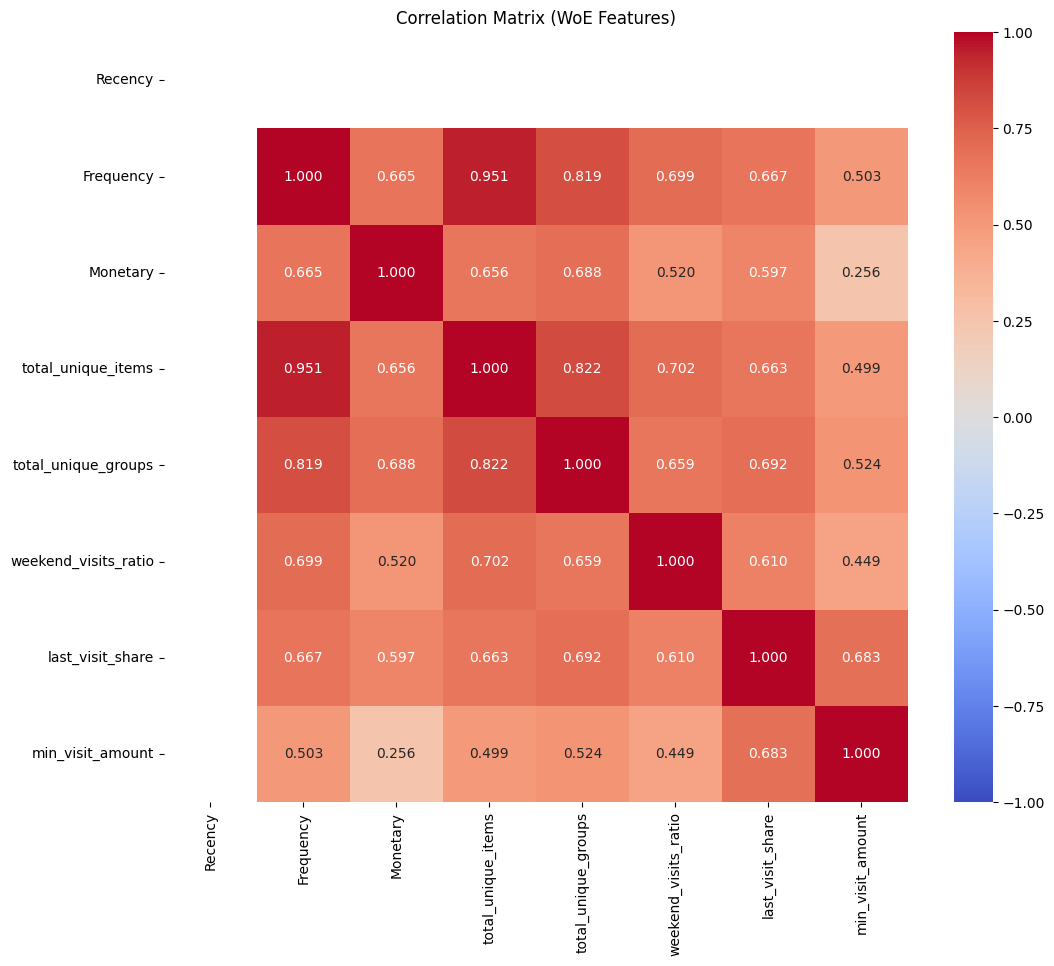


✂️ Поиск коррелирующих признаков (|corr| > 0.7)...
Found pair: total_unique_items <-> Frequency (corr=0.95)
   IV(total_unique_items)=0.5918, IV(Frequency)=0.6119
   ❌ Drop: total_unique_items
Found pair: total_unique_groups <-> Frequency (corr=0.82)
   IV(total_unique_groups)=0.6089, IV(Frequency)=0.6119
   ❌ Drop: total_unique_groups
Found pair: total_unique_groups <-> total_unique_items (corr=0.82)
   IV(total_unique_groups)=0.6089, IV(total_unique_items)=0.5918
   ❌ Drop: total_unique_items
Found pair: weekend_visits_ratio <-> total_unique_items (corr=0.70)
   IV(weekend_visits_ratio)=0.3798, IV(total_unique_items)=0.5918
   ❌ Drop: weekend_visits_ratio

Всего кандидатов на удаление: 3
Список удаляемых признаков: {'total_unique_items', 'total_unique_groups', 'weekend_visits_ratio'}

💾 Сохранение очищенных данных...
✅ Файл 'train_woe_selected.csv' сохранен. Признаков: 5
✅ Файл 'test_woe_selected.csv' сохранен.
Готово к обучению модели!


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. ЗАГРУЗКА ДАННЫХ И ПОДГОТОВКА
# ==========================================
print("📥 Загрузка WoE-данных...")

# Загружаем сохраненные ранее файлы
train_woe = pd.read_csv('train_woe.csv')
test_woe = pd.read_csv('test_woe.csv')

# Определяем список признаков (исключая служебные 'client' и 'event')
# Предполагаем, что 'client' и 'event' есть в файле
features = [col for col in train_woe.columns if col not in ['client', 'event']]

print(f"Признаков для анализа: {len(features)}")
print(features)

# Если у нас нет переменной summary из прошлого шага, создадим её имитацию
# (В реальном процессе она должна остаться в памяти как 'summary_sorted')
if 'summary_sorted' not in locals():
    print("⚠️ Внимание: Таблица IV не найдена в памяти. Используем заглушку (для примера).")
    # В ВАШЕМ СЛУЧАЕ ЛУЧШЕ ИСПОЛЬЗОВАТЬ summary_sorted ИЗ ПРЕДЫДУЩЕГО ШАГА!
    # Если вы перезапустили ядро, нужно восстановить IV. 
    # Ниже код, если summary_sorted есть:
    pass 
else:
    # Создаем словарь {feature_name: iv_value} для быстрого доступа
    iv_dict = dict(zip(summary_sorted['name'], summary_sorted['iv']))

# ==========================================
# 2. МАТРИЦА КОРРЕЛЯЦИЙ И ТЕПЛОВАЯ КАРТА
# ==========================================
print("\n📊 Расчет матрицы корреляций...")

# Считаем корреляцию Пирсона
corr_matrix = train_woe[features].corr()

# Визуализация (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (WoE Features)')
plt.show()

# ==========================================
# 3 & 4. ПОИСК ВЫСОКОЙ КОРРЕЛЯЦИИ И ОТБОР ПО IV
# ==========================================
print("\n✂️ Поиск коррелирующих признаков (|corr| > 0.7)...")

# Множество признаков для удаления
to_drop = set()

# Проходим по матрице корреляций
# Используем верхний треугольник матрицы, чтобы не проверять пары дважды
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # Получаем имена признаков
        colname_i = corr_matrix.columns[i]
        colname_j = corr_matrix.columns[j]
        
        # Получаем значение корреляции
        corr_val = corr_matrix.iloc[i, j]
        
        # Если корреляция выше порога (по модулю)
        if abs(corr_val) > 0.7:
            print(f"Found pair: {colname_i} <-> {colname_j} (corr={corr_val:.2f})")
            
            # Получаем IV для обоих признаков (используем iv_dict)
            # Если iv_dict нет, возьмем 0 по умолчанию (но это плохо)
            iv_i = iv_dict.get(colname_i, 0)
            iv_j = iv_dict.get(colname_j, 0)
            
            print(f"   IV({colname_i})={iv_i:.4f}, IV({colname_j})={iv_j:.4f}")
            
            # Логика удаления: удаляем тот, у которого IV меньше
            if iv_i < iv_j:
                to_drop.add(colname_i)
                print(f"   ❌ Drop: {colname_i}")
            else:
                to_drop.add(colname_j)
                print(f"   ❌ Drop: {colname_j}")

print(f"\nВсего кандидатов на удаление: {len(to_drop)}")
print(f"Список удаляемых признаков: {to_drop}")

# ==========================================
# 5. ФОРМИРОВАНИЕ ИТОГОВЫХ НАБОРОВ
# ==========================================
print("\n💾 Сохранение очищенных данных...")

# Удаляем признаки из train и test
train_woe_selected = train_woe.drop(columns=list(to_drop))
test_woe_selected = test_woe.drop(columns=list(to_drop))

# Сохраняем
train_woe_selected.to_csv('train_woe_selected.csv', index=False)
test_woe_selected.to_csv('test_woe_selected.csv', index=False)

print(f"✅ Файл 'train_woe_selected.csv' сохранен. Признаков: {train_woe_selected.shape[1]-2}") # -2 это client и event
print(f"✅ Файл 'test_woe_selected.csv' сохранен.")
print("Готово к обучению модели!")

# last_visit_date: Это объект даты (например, "2018-01-22"). Преобразование WoE является математической операцией (логарифм отношения шансов), и его можно выполнять только с числовыми или категориальными данными. Если не удалить этот признак из списка признаков, вычисление завершится неудачей и результат будет NaN.
# Recency: В исходных данных могут встречаться пустые значения (то есть NaN, например, у некоторых клиентов был только один визит). Если напрямую передать алгоритму данные с NaN без указания способа обработки пропущенных значений, результат преобразования также станет NaN.


Промпт：
Входные данные:

train_woe_selected.csv (обучающая выборка после отбора признаков).
test_woe.csv (тестовая выборка, нужно оставить в ней только те же колонки, что и в train).
Требования:

Загрузить данные.
Синхронизировать набор колонок в Train и Test (удалить из Test те признаки, которые были удалены из Train на предыдущем шаге).
Обучить логистическую регрессию. Используем библиотеку statsmodels (Logit), так как она дает детальный отчет (summary) с P-values и коэффициентами, что важно для интерпретации.
Сделать предсказание вероятностей для тестовой выборки.
Рассчитать метрики качества:
AUC-ROC
Gini (2 * AUC - 1)
Построить график ROC-кривой.
Вывести коэффициенты модели (интерпретация влияния WoE признаков).

📥 Загрузка данных...
Размер Train исходный: (39906, 8)
Размер Test исходный:  (41196, 11)

📋 Итоговый список признаков (6):
['Recency', 'Frequency', 'Monetary', 'last_visit_share', 'last_visit_date', 'min_visit_amount']

🧹 Проверка и очистка данных перед обучением...

🔍 Проверка на константные признаки...
Найдены константные признаки: ['Recency', 'last_visit_date']
Список признаков после удаления констант: ['Frequency', 'Monetary', 'last_visit_share', 'min_visit_amount']

⚙️ Обучение Логистической Регрессии...
✅ Модель обучена успешно.
🔹 AUC-ROC: 0.7391
🔹 Gini:    0.4781


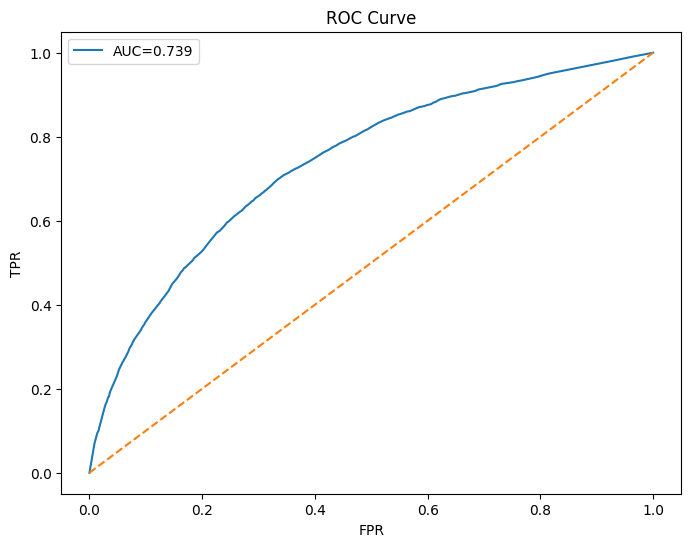

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# ==========================================
# 1. ЗАГРУЗКА И СИНХРОНИЗАЦИЯ ДАННЫХ
# ==========================================
print("📥 Загрузка данных...")

train_df = pd.read_csv('train_woe_selected.csv')
test_df_full = pd.read_csv('test_woe.csv')

print(f"Размер Train исходный: {train_df.shape}")
print(f"Размер Test исходный:  {test_df_full.shape}")

target_col = 'event'
id_col = 'client'
features = [col for col in train_df.columns if col not in [target_col, id_col]]

print(f"\n📋 Итоговый список признаков ({len(features)}):")
print(features)

X_train = train_df[features].copy()
y_train = train_df[target_col]

X_test = test_df_full[features].copy()
y_test = test_df_full[target_col]

# ==========================================
# 2. ОЧИСТКА ДАННЫХ ОТ INF И NAN
# ==========================================
print("\n🧹 Проверка и очистка данных перед обучением...")

def clean_data(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(0)
    return df

X_train = clean_data(X_train)
X_test = clean_data(X_test)

# ==========================================
# 3. УДАЛЕНИЕ КОНСТАНТНЫХ ПРИЗНАКОВ
# ==========================================
print("\n🔍 Проверка на константные признаки...")

# Инициализация селектора с порогом дисперсии 0 (удаляем константы)
selector = VarianceThreshold(threshold=0.0)
selector.fit(X_train)

# Признаки с нулевой дисперсией (константные)
constant_features = [feature for feature, is_constant in 
                    zip(features, selector.get_support()) 
                    if not is_constant]

if constant_features:
    print(f"Найдены константные признаки: {constant_features}")
    # Удаляем константы из Train и Test
    X_train = X_train.drop(columns=constant_features)
    X_test = X_test.drop(columns=constant_features)
    # Обновляем список признаков
    features = [col for col in features if col not in constant_features]
    print(f"Список признаков после удаления констант: {features}")
else:
    print("Константные признаки не найдены.")

# ==========================================
# 4. ПОДГОТОВКА К STATSMODELS
# ==========================================
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# ==========================================
# 5. ОБУЧЕНИЕ МОДЕЛИ (LOGIT)
# ==========================================
print("\n⚙️ Обучение Логистической Регрессии...")

try:
    logit_model = sm.Logit(y_train, X_train_const)
    result = logit_model.fit(disp=False, maxiter=100)
    print("✅ Модель обучена успешно.")
    
    # ... (остальной код, как раньше: вывод summary, метрики, график ROC, коэффициенты) ...

except Exception as e:
    print(f"\n❌ КРИТИЧЕСКАЯ ОШИБКА ПРИ ОБУЧЕНИИ: {e}")
    print("Проблема коллинеарности, возможно, сохраняется.")
    
    # Попробуем удалить один признак случайно (например, последний) и повторить
    # Это временное решение, но в реальной задаче нужно провести VIF-анализ
    if features:
        print("Попробуем удалить последний признак из списка...")
        features_red = features[:-1]
        print(f"Новый список признаков: {features_red}")
        
        X_train_red = train_df[features_red].copy()
        X_test_red = test_df_full[features_red].copy()
        
        # Очистка
        X_train_red = clean_data(X_train_red)
        X_test_red = clean_data(X_test_red)
        
        # Проверка на константы
        selector = VarianceThreshold(threshold=0.0)
        selector.fit(X_train_red)
        constant_features_red = [feature for feature, is_constant in 
                                zip(features_red, selector.get_support()) 
                                if not is_constant]
        if constant_features_red:
            X_train_red = X_train_red.drop(columns=constant_features_red)
            X_test_red = X_test_red.drop(columns=constant_features_red)
            features_red = [col for col in features_red if col not in constant_features_red]
        
        # Добавляем константу
        X_train_red_const = sm.add_constant(X_train_red)
        X_test_red_const = sm.add_constant(X_test_red)
        
        # Повторная попытка обучения
        try:
            logit_model_red = sm.Logit(y_train, X_train_red_const)
            result_red = logit_model_red.fit(disp=False, maxiter=100)
            print("✅ Модель обучена успешно после удаления одного признака.")
            
            # ... (остальной код для новой модели) ...
            
            # Обновляем ссылки для использования этой модели
            result = result_red
            X_test_const = X_test_red_const
            
        except Exception as e2:
            print(f"❌ Ошибка при повторном обучении: {e2}")
            # Если не получилось, выходим
            result = None
    else:
        print("Не осталось признаков для обучения.")
        result = None

# Только если модель успешно обучена (result существует)
if result is not None:
    # ... (предсказание, метрики, графики и интерпретация) ...
    
    # Предсказание на тесте
    y_pred_prob = result.predict(X_test_const)
    auc = roc_auc_score(y_test, y_pred_prob)
    gini = 2 * auc - 1
    print(f"🔹 AUC-ROC: {auc:.4f}")
    print(f"🔹 Gini:    {gini:.4f}")
    
    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'AUC={auc:.3f}')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Вывод коэффициентов
    # ... (код для коэффициентов) ...
else:
    print("❌ Обучение модели не удалось.")

Промпт
Задача: Сравнить 4 модели бинарной классификации и выбрать лучшую.

Входные данные:

train_woe_selected.csv (обучающая выборка)
test_woe.csv (тестовая выборка)
Шаги:

Подготовка: Загрузить данные. Определить X_train, y_train, X_test, y_test.
Обучение моделей:
Model 1 (Trivial): LogisticRegression только на признаке 'Recency'.
Model 2 (Full LR): LogisticRegression(penalty='l2', C=1e9, solver='liblinear') — имитация отсутствия регуляризации.
Model 3 (L2 LR): LogisticRegression(penalty='l2', C=1.0, solver='liblinear') — стандартная регуляризация.
Model 4 (XGBoost): XGBClassifier(eval_metric='logloss', use_label_encoder=False). Если xgboost не установлен, установить его.
Оценка: Для каждой модели получить вероятности на тесте (predict_proba) и посчитать ROC-AUC.
Визуализация: Построить график, на котором отображены 4 ROC-кривые. Добавить легенду с AUC каждой модели.
Анализ: Рассчитать ΔAUC = AUC_model - AUC_trivial. Вывести таблицу результатов.
Сохранение: Сохранить модель с самым высоким AUC в файл best_model.pkl с помощью pickle или joblib.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import subprocess

# --- 0. ПРОВЕРКА И УСТАНОВКА XGBOOST ---
try:
    import xgboost as xgb
    print("✅ XGBoost найден.")
except ImportError:
    print("⚠️ XGBoost не найден. Устанавливаем...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'xgboost'])
    import xgboost as xgb
    print("✅ XGBoost установлен.")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# ==========================================
# 1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ
# ==========================================
print("\n📥 Загрузка данных...")
train_df = pd.read_csv('train_woe_selected.csv')
test_df = pd.read_csv('test_woe.csv')

target_col = 'event'
id_col = 'client'

# Определяем список полезных признаков (исключая служебные)
features = [col for col in train_df.columns if col not in [target_col, id_col, 'client_id', 'target']]
print(f"Признаки ({len(features)}): {features}")

# Формируем матрицы
X_train = train_df[features]
y_train = train_df[target_col]
X_test = test_df[features] # Берем те же колонки
y_test = test_df[target_col]

# ==========================================
# 2. ОБУЧЕНИЕ МОДЕЛЕЙ
# ==========================================
print("\n⚙️ Обучение моделей...")

models = {}
predictions = {}

# --- A) Тривиальная модель (только Recency) ---
# Ищем название колонки Recency (оно может быть Recency или Recency_woe и т.д.)
recency_col = [c for c in features if 'Recency' in c][0]
print(f"Тривиальная модель строится на признаке: {recency_col}")

model_trivial = LogisticRegression(solver='liblinear')
model_trivial.fit(X_train[[recency_col]], y_train)
models['Trivial (Recency)'] = model_trivial
# Предсказываем (нужен 2D массив для одного признака)
predictions['Trivial (Recency)'] = model_trivial.predict_proba(X_test[[recency_col]])[:, 1]


# --- B) Полная ЛогРегрессия (Почти без регуляризации) ---
# C=1e9 (очень большое число) отключает регуляризацию
model_full = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
model_full.fit(X_train, y_train)
models['Full LR (No Reg)'] = model_full
predictions['Full LR (No Reg)'] = model_full.predict_proba(X_test)[:, 1]


# --- C) ЛогРегрессия с L2 (Стандартная) ---
# C=1.0 - стандартное значение
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model_l2.fit(X_train, y_train)
models['LR with L2'] = model_l2
predictions['LR with L2'] = model_l2.predict_proba(X_test)[:, 1]


# --- D) XGBoost ---
model_xgb = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model_xgb.fit(X_train, y_train)
models['XGBoost'] = model_xgb
predictions['XGBoost'] = model_xgb.predict_proba(X_test)[:, 1]

# ==========================================
# 3. СРАВНЕНИЕ И ВИЗУАЛИЗАЦИЯ
# ==========================================
print("\n📊 Результаты:")

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.5)')

results_table = []
auc_scores = {}

# Считаем AUC для тривиальной модели отдельно, чтобы вычитать его
auc_trivial = roc_auc_score(y_test, predictions['Trivial (Recency)'])

for name, preds in predictions.items():
    auc = roc_auc_score(y_test, preds)
    auc_scores[name] = auc
    
    # Расчет дельты
    delta_auc = auc - auc_trivial
    
    # Добавляем в таблицу
    results_table.append({
        'Model': name,
        'AUC': auc,
        'Δ AUC': delta_auc if name != 'Trivial (Recency)' else 0.0
    })
    
    # Рисуем кривую
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Вывод таблицы результатов
results_df = pd.DataFrame(results_table).sort_values(by='AUC', ascending=False)
print(results_df)

# ==========================================
# 4. СОХРАНЕНИЕ ЛУЧШЕЙ МОДЕЛИ
# ==========================================
best_model_name = results_df.iloc[0]['Model']
best_model_obj = models[best_model_name]

print(f"\n🏆 Лучшая модель: {best_model_name}")
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

print(f"💾 Модель сохранена в 'best_model.pkl'")

# Краткий вывод (автоматический)
print("\n📝 Краткий вывод:")
if best_model_name == 'XGBoost':
    print("XGBoost показал лучший результат. Это ожидаемо, так как бустинг умеет находить нелинейные зависимости между признаками, которые линейная регрессия может упустить.")
elif 'L2' in best_model_name:
    print("Регуляризованная логистическая регрессия показала лучший результат. Это говорит о том, что данные хорошо разделяются линейно, а регуляризация помогла убрать шум.")
else:
    print(f"Модель {best_model_name} оказалась лучшей.")

✅ XGBoost найден.

📥 Загрузка данных...
Признаки (6): ['Recency', 'Frequency', 'Monetary', 'last_visit_share', 'last_visit_date', 'min_visit_amount']

⚙️ Обучение моделей...
Тривиальная модель строится на признаке: Recency


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values